## Preparing the environment:

1) Download the dataset of the [paper](https://www.aeaweb.org/articles?id=10.1257/aer.20171764) and unpack it as `/data/116200-V1`
2) Setup the python environment:


In [ ]:
!pip install -r requirements.txt

3) Get an OpenAI API key and paste it below. Consult Santiago Cantillo-Cleves slides:

In [79]:
import os 
openai_api_key = 'sk-...'
os.environ['OPENAI_API_KEY'] = openai_api_key

## Preparing the data and training the model

1) Run the `prepare_data.py`. This creates data files and sends them to OpenAI. You can dig into the file to understand how it works

In [ ]:
!python prepare_data.py

2) Run the `train.py` script. This will train the model. After the training is done you would recieve an email with it's id. This will take ~15 minutes, you can close the laptop and go have a coffee. Consult OpenAI documentation for finetuning on how to check status if you need.

In [ ]:
!python train.py

3) Run the 'predict.py' script. This will generate the predictions and save them to the `data/train` folder. You need to pass the model id you received in the email. Also, the predict scipt is done in a very suboptimal way. You need to consult Santiago Cantillo-Cleves slides for a better way to do it in batches. This script can run into API rate limit for a day and also works slow

In [ ]:
!python predict.py --model_id <model_id>

## Analysis of the data

In [ ]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_json('data/train/val_predictions.json')

In [68]:
data['best_prediction'] = data['Prediction'].apply(lambda x: sorted(x.keys(), key=lambda y: x[y], reverse=True)[0])
data['absolute_prob'] = data['Prediction'].apply(lambda x: next(iter(x.values())))
data['prob'] = data['absolute_prob'] + (1 - 2 * data['absolute_prob']) * (data['best_prediction'].str[0:3] == 'Det')
data['correct'] = data['best_prediction'].str[0:3] == data['Treatment'].str[0:3]
data['Advice_length'] = data['Advice'].str.len()
data.head()

,Advice,Prediction,Treatment,best_prediction,absolute_prob,prob,correct,Advice_length
0,Advice: It is equally likely that the company ...,"{'Prob': 1.0, ' probabil': 0.0, ' Prob': 0.0, ...",Probabilistic,Prob,1.000,1.000,True,448
1,Advice: Make sure you offer the least amount y...,"{'Det': 1.0, 'Determ': 0.0, ' Det': 0.0, 'Den'...",Deterministic,Det,1.000,0.000,True,84
2,Advice: When the spread was large between the ...,"{'Prob': 1.0, ' probabil': 0.0, ' Prob': 0.0, ...",Probabilistic,Prob,1.000,1.000,True,289
3,Advice: Buy company B profit will be 180 -,"{'Det': 0.999, ' Det': 0.0, 'Profit': 0.0, 'De...",Deterministic,Det,0.999,0.001,True,42
4,Advice: I would be willing to pay $20. In my o...,"{'Prob': 1.0, ' Prob': 0.0, ' probabil': 0.0, ...",Probabilistic,Prob,1.000,1.000,True,172


In [61]:
data.loc[14, 'Advice']

"Advice: No advice, no idea what I'm doing. -"

In [62]:
data.loc[60, 'Advice']

"Advice: I would always choose the lowest price because you don't want to overpay. -"

In [69]:
np.mean(data['correct'])

np.float64(0.84)

<Axes: >

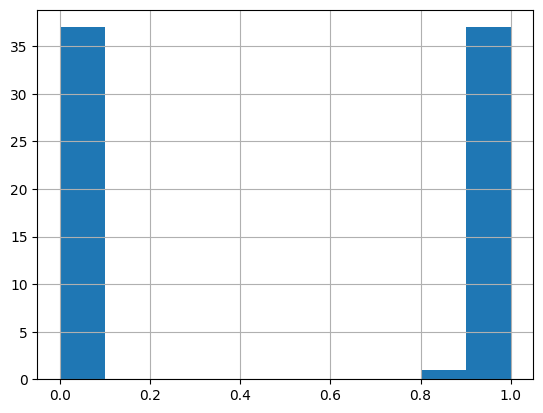

In [70]:
data['prob'].hist()

In [77]:
print(data.groupby('Treatment')['Advice_length'].mean().to_latex())

\begin{tabular}{lr}
\toprule
 & Advice_length \\
Treatment &  \\
\midrule
Deterministic & 168.216216 \\
Probabilistic & 256.315789 \\
\bottomrule
\end{tabular}
